# Business Problem

In [ ]:
In this Machine Learning end to end project, we  worked on financial application data and predicted the customer who will
take a premium version app subscription or not. Then the company will take action on the customers to give the offers or not.
The data contain the customer’s behavior and our job to find the insights from it. To complete this project,
i used python programming and it’s libraries NumPy, Pandas, Matplotlib, and Seaborn. So let’s start……….


Bussines Problem
The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like 
bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features
and customer wants to use the premium feature then they have to pay some amount to unlock it.

The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it.
That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior
. After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers 
will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those 
customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to 
those customers and earn more money.

So before staring the ML project, we need to import some required libraries.

# Import essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

# import dataset & explore
#It is time to import business data and see how it looks like. To import dataset and convert it to pandas DataFrame we used pandas pd.read_csv() function because of the dataset in CSV file format. The dataset file name is “FineTech_appData.csv”.

In [2]:
path=r"https://drive.google.com/uc?export=download&id=1Gb0y4RFUGj2kzrD7B1g6y49y-ZvtEsID"
fineTech_appData= pd.read_csv(path)

In [3]:
fineTech_appData.shape

(50000, 12)

# The business datadet contains 50,000 customers information with 12 features .

#I think you are very curious to know how the business data look like for that we used DataFrame.head() method get to head of fineTech_appData DataFrame and DataFrame.tail() method to get the tail of the fineTech_appData DataFrame.

In [4]:
fineTech_appData.head(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [5]:
fineTech_appData.tail(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


The 6th number column’s (screen_list) full information not visible, so for that we used below python code snippet. We print only 5 rows from index 1 to 5 from the

In [4]:
for i in [1,2,3,4,5]:
    print(fineTech_appData.loc[i,"screen_list"],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



# Find the null value in DataFrame using DataFrame.isnull() method and take summation by sum() method.



In [7]:
fineTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

# All columns contain 0 null value except enrolled_date. The enrolled_date column has total 18926 null values.

#Take brief information about the dataset using DataFrame.info() method.

In [46]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [9]:
fineTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


From the output, we can know more about the dataset. The mean age of the customer is 31.72. Only 10.7% of customers played minigame and 17.2% customer used premium features of the app, likes 16.5 %. The 62.1% customer enrolled in the premium app.

If you observe the description of ‘dayofweek’ column then you can not get proper information. To solve this issue we print unique values of each column and its length.

In [5]:
# Get the unique value of each columns and it's length
feature=fineTech_appData.columns
for i in feature:
    print("""unique value of {}\n{}len is {}\n ..........\n """.format(i,fineTech_appData[i].unique(),len(fineTech_appData[i].unique())))

unique value of user
[235136 333588 254414 ... 302367 324905  27047]len is 49874
 ..........
 
unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']len is 49747
 ..........
 
unique value of dayofweek
[3 6 1 4 2 0 5]len is 7
 ..........
 
unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']len is 24
 ..........
 
unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86

In the above output, we got information about the ‘dayofweek’ and ‘hour’ columns. The customer registers the app each day of the week and 24 hours.

The ‘hour’ column contains object data type, so we converted into integer data type format.

In [6]:
#  hour data convert string to int
fineTech_appData['hour']=fineTech_appData.hour.str.slice(1,3).astype(int)
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [7]:
#To visualize the data need numeric values for that we drop some columns that datatype is the object.
finetech_appdata=fineTech_appData.drop(['user','first_open','screen_list','enrolled_date'],axis=1)
finetech_appdata.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data visualization Heatmap using the correlation matrix



Heatmap uses to find the correlation between each and every features using the correlation matrix.

Text(0.5, 1.0, 'HeatMap using correlation matrix of fineTech')

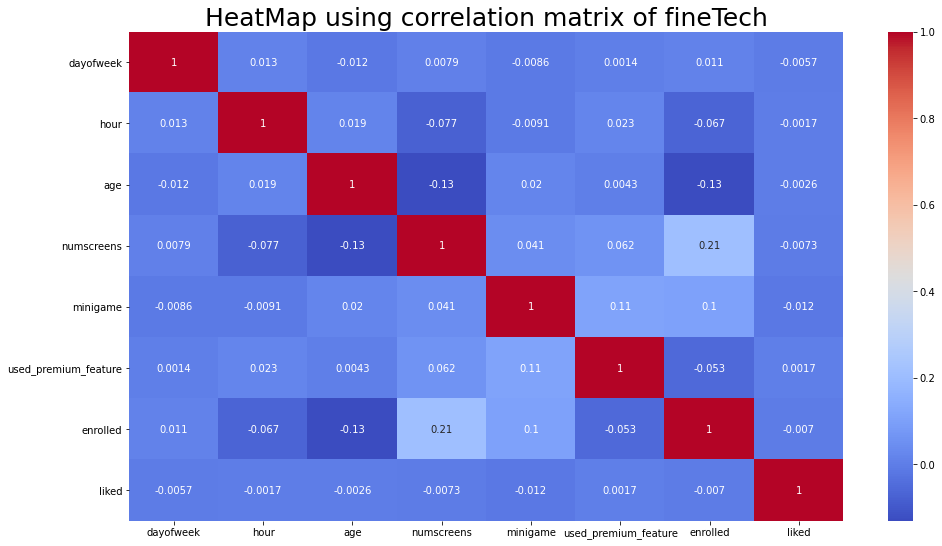

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(finetech_appdata.corr(),annot=True,cmap='coolwarm')
plt.title("HeatMap using correlation matrix of fineTech",fontsize=25)

In the finetechappdata dataset, there is no strong correlation between any features. There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app. There is a slight correlation between ‘minigame’ with ‘enrolled’ and ‘used_premium_feature’. The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

# Pair plot of fineTech_appData
The pair plot helps to visualize the distribution of data and scatter plot.

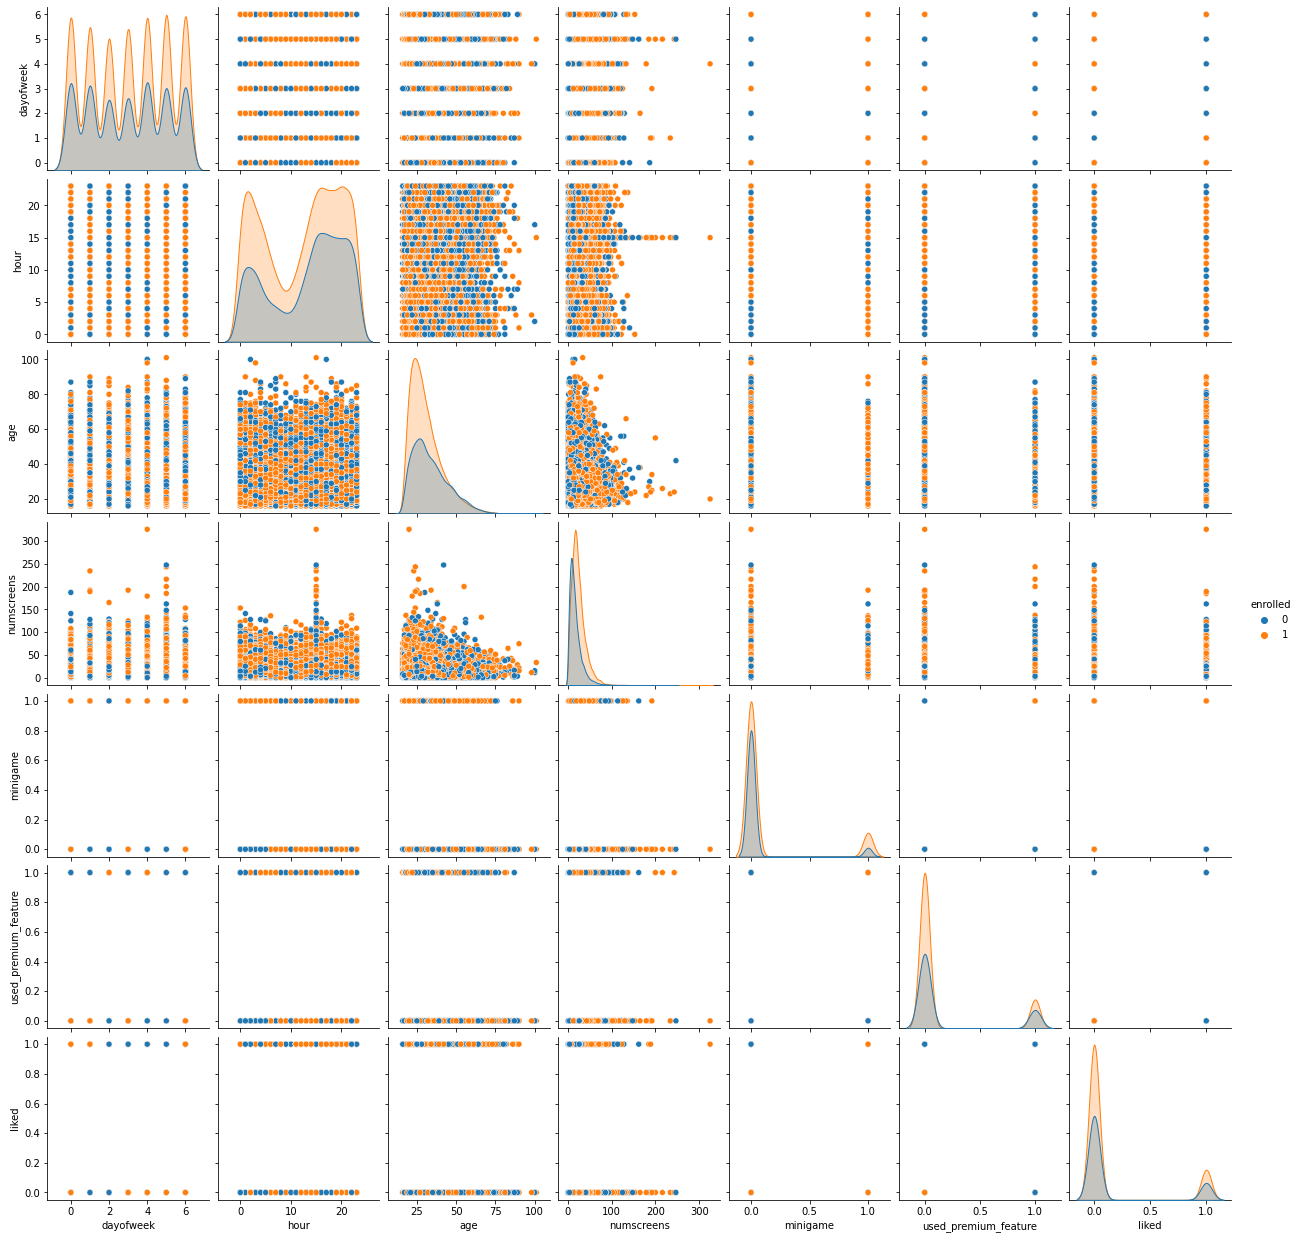

In [15]:
# Pailplot of fineTech_appData2 Dataset
 
#%matplotlib qt5 # for show graph in seperate window
sns.pairplot(finetech_appdata, hue  = 'enrolled')

In pair plot we can see, the maximum features have two values like 0 and 1 and orange dots show the enrolled customer’s features. So we visualize the counterplot of enrolled data.

# Countplot of enrolled

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='enrolled', ylabel='count'>

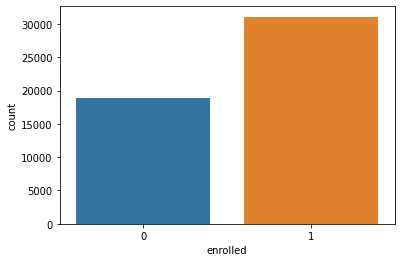

In [16]:
# Show counterplot of 'enrolled' feature
sns.countplot(fineTech_appData.enrolled)

 Here we can see the exact value of enrolled & not enrolled customers.

In [8]:
# value enrolled and not enrolled customers
print("Not Enrolled User= ",(fineTech_appData.enrolled<1).sum(),"out of 50000")
print("Enrolled user=",50000-(fineTech_appData.enrolled<1).sum(),"out of 50000")

Not Enrolled User=  18926 out of 50000
Enrolled user= 31074 out of 50000


Histogram of each feature of finetech_appdata
In pair plot, we saw the distribution of each feature but here we visualize in the histogram to understand easily.

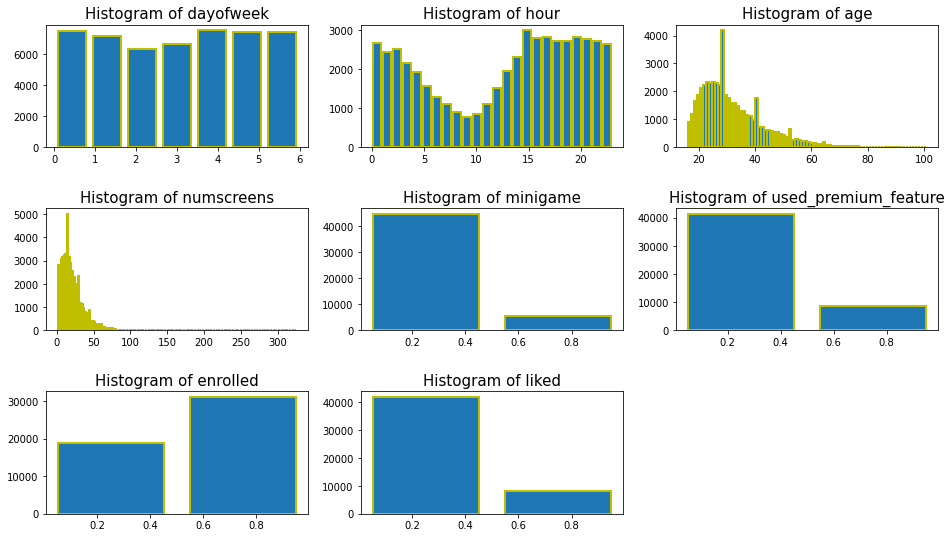

In [19]:
# plot histogram 
 
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = finetech_appdata.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(finetech_appdata[j].unique()) # bins for histogram
    plt.hist(finetech_appdata[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)


In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.

The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.
The histogram of ‘hour’ shows the less customer register on the app around 10 AM.

The ‘age’ histogram shows, the maximum customers are younger.

The ‘numsreens’ histogram shows the few customers saw more than 40 screens.

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


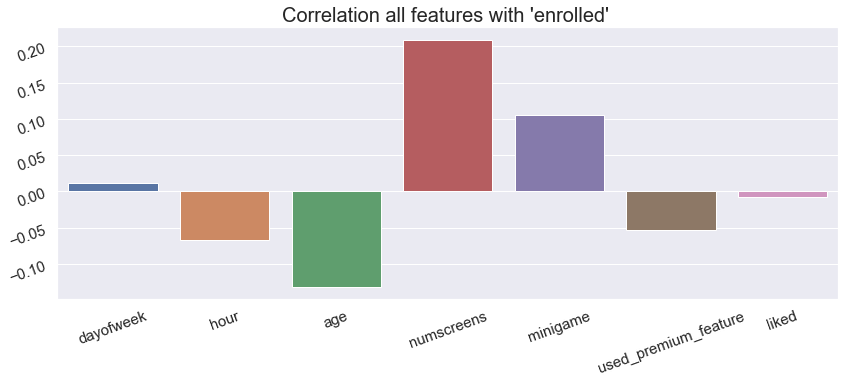

In [21]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
fineTech_appData3 = finetech_appdata.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(finetech_appdata.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x & y ticks font

We saw the heatmap correlation matrix but this was not showing correlation clearly but you can easily understand which feature is how much correlated with ‘enrolled’ feature using the above barplot.

The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.

In [9]:
# parsinf object data into data time format

#fineTech_appData['first_open'] =[parser.parse(i) for i in fineTech_appData['first_open']]
 
#fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]
 
#fineTech_appData.dtypes
# we can use any of the method to convert into datetime

fineTech_appData['first_open']=pd.to_datetime(fineTech_appData['first_open'])
fineTech_appData['enrolled_date']=pd.to_datetime(fineTech_appData['enrolled_date'])
fineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

We are finding how much time the customer takes to get enrolled in the premium feature app after registration. For that subtract ‘fineTech_appData.first_open’ from ‘fineTech_appData.enrolled_date’ and set data type as timedelta64 in hours.

In [12]:
fineTech_appData['time_to_enrolled']=(fineTech_appData.enrolled_date-fineTech_appData.first_open).astype('timedelta64[h]')

# Showing the distribution of time taken to enrolled the app.

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

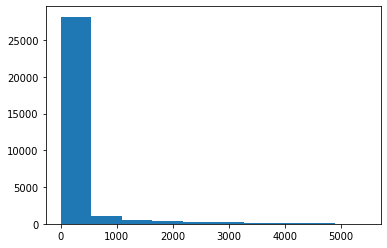

In [11]:
# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna())

let’s try to show the distribution in range 0 to 100 hours.

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

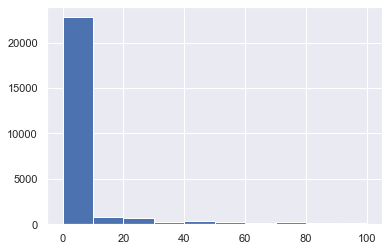

In [27]:
# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100)) 


# Feature selection

In [13]:
# Those customers have enrolled after 48 hours set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled>48,'enrolled']=0

In [14]:
fineTech_appData[['time_to_enrolled']]

,time_to_enrolled
0,NaN
1,NaN
2,NaN
3,0.0
4,0.0
...,...
49995,0.0
49996,NaN
49997,NaN
49998,0.0


In [15]:
fineTech_appData.drop(columns=['time_to_enrolled','enrolled_date','first_open'],inplace=True)

# Read another CSV file that contains the top screens name.

In [16]:
# read csv file and convert it into numpy array
finetech_appdata_screen=pd.read_csv("top_screens.csv").top_screens.values
finetech_appdata_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [17]:
#Add ‘,’ at the end of each string of ‘screen_list’ for further operation.
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','


In [18]:
fineTech_appData[['screen_list']]

,screen_list
0,"idscreen,joinscreen,Cycle,product_review,ScanP..."
1,"joinscreen,product_review,product_review2,Scan..."
2,"Splash,Cycle,Loan,"
3,"product_review,Home,product_review,Loan3,Finan..."
4,"idscreen,joinscreen,Cycle,Credit3Container,Sca..."
...,...
49995,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,..."
49996,"Cycle,Splash,Home,RewardsContainer,"
49997,"joinscreen,product_review,product_review2,Scan..."
49998,"Cycle,Home,product_review,product_review,produ..."


The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

In [19]:
# string into to number
 
for screen_name in finetech_appdata_screen:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")

In [20]:
fineTech_appData.shape

(50000, 68)

You can see the shape of the dataset has changed from 12 to 68 columns.

In [62]:
# head of DataFrame
fineTech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Those screens are not availble in ‘fineTech_app_screen’ that are counted and counted number store in new column by name ‘remain_screen_list’.


# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']


'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [22]:
# count remain screen list and store counted number in 'remain_screen_list'
 
fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")
fineTech_appData['remain_screen_list']

0         7
1         5
2         0
3         6
4        10
         ..
49995     6
49996     1
49997     6
49998    13
49999     5
Name: remain_screen_list, Length: 50000, dtype: int64

Droping ‘screen_list’ column.

In [23]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [24]:
# total 68 columns
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.

In [25]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count']=fineTech_appData[saving_screens].sum(axis=1)
fineTech_appData.drop(columns = saving_screens, inplace = True)


In [82]:
fineTech_appData.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0


In [26]:
#similarly for credit, CC1 and loan screens.
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count']=fineTech_appData[credit_screens].sum(axis=1)
fineTech_appData.drop(columns=credit_screens,axis=1,inplace=True)

In [27]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count']=fineTech_appData[loan_screens].sum(axis=1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [28]:
fineTech_appData.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,0,6,0,3,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,0,10,0,2,1


In [29]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [30]:
fineTech_appData.shape

(50000, 50)

In [29]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [30]:
# Numerical distribution of fineTech_appData
fineTech_appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,loan_screens_count,cc_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.788400,0.176860
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.677462,0.612787
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


# Heatmap with the correlation matrix

<AxesSubplot:>

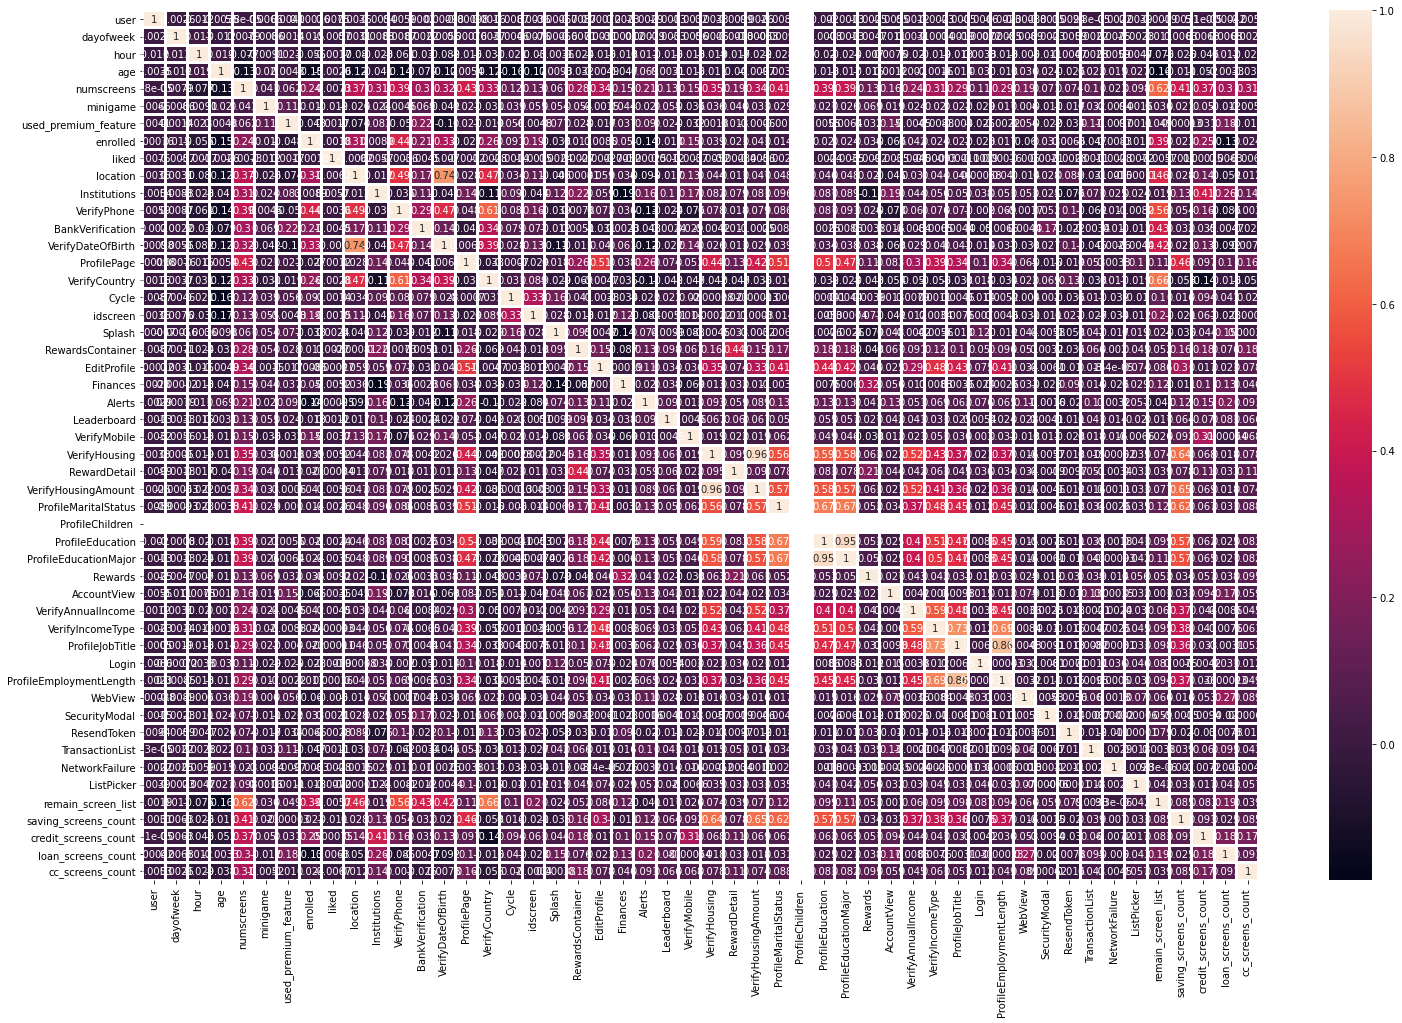

In [31]:
# Heatmap with correlation matrix of new fineTech_appData
 
plt.figure(figsize = (25,16)) 
sns.heatmap(fineTech_appData.corr(), annot = True, linewidth =2)

# Data preprocessing

## Split dataset in Train and Test

In [31]:
clean_finetech_appdata=fineTech_appData
target=fineTech_appData['enrolled']
fineTech_appData.drop(columns='enrolled',inplace=True)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(fineTech_appData,target,test_size=0.2,random_state=0)

In [33]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [34]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


# Feature Scaling


### The multiple features in the different units so for the best accuracy need to convert all features in a single unit.

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

# Machine Learning Model Building


The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.

To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model. So let’s try.

First, we import the required packages.

In [39]:
# impoer required packages
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


# Decision Tree Classifier

In [47]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7008

In [48]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7001

# K – Nearest Neighbor Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.6978

In [51]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)

0.7315

# Naive Bayes Classifier

In [52]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)
accuracy_score(y_test,y_pred_nb)

0.7114

In [53]:
nb_model2=GaussianNB()
nb_model2.fit(X_train_sc,y_train)
y_pred_nb_sc=nb_model2.predict(X_test_sc)
accuracy_score(y_test,y_pred_nb)

0.7114

# Random Forest Classifier

In [55]:
#random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.7634

In [56]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7629

# Logistic Regression

In [62]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7687

In [64]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

0.768

# Support Vector Classifier


In [40]:
#Support Vector Machine
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
y_pred_svc=svc_model.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.7609

In [41]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

0.7789

# XGBoost Classifier

In [44]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

[10:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.781

In [45]:
# train with Standert Scaling dataset
xgb_model2=XGBClassifier()
xgb_model2.fit(X_train_sc,y_train)
y_pred_xgb_sc=xgb_model2.predict(X_test_sc)
accuracy_score(y_test,y_pred_xgb_sc)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.781

In [48]:
# XGB classifier with parameter tuning
xgb_model_pt1=XGBClassifier(learning_rate=0.01,n_estimators=5000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.8,colsample_bytree=0.8,
                            
                           reg_alpha=0.005,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_model_pt1.fit(X_train,y_train)
y_pred_xgb_pt1=xgb_model_pt1.predict(X_test)
accuracy_score(y_test,y_pred_xgb_pt1)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7887

In [49]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7886

### We observ that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

# Confusion Matrix

Text(0.5, 1.0, 'Confussion Matrix')

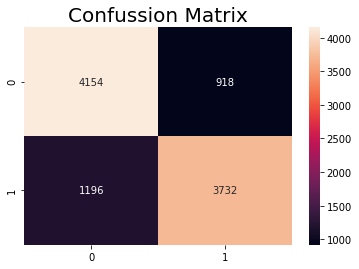

In [53]:
# confussion matrix
cm_xgb_pt2=confusion_matrix(y_test,y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2,annot=True,fmt='g')
plt.title("Confussion Matrix",fontsize=20)

The model is giving type II error higher than type I.

# Classification report of ML model

In [54]:
#classification Report
cr_xgb_pt2=classification_report(y_test,y_pred_xgb_sc_pt2)
print("Classification report>>> \n",cr_xgb_pt2)


Classification report>>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



# Cross-validation of the ML model

### To find the ML model is overfitted, under fitted or generalize doing cross-validation.

In [55]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(estimator=xgb_model_pt2, X=X_train_sc,y=y_train,cv=10)
print("Cross validation  of XGBOOST model = ",cross_validation)
print("Cross_validation of XGBOOST model (in mean) =",cross_validation.mean())

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:38:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross validation  of XGBOOST model =  [0.79325 0.7795  0.78875 0.78475 0.77925 0.78725 0.7925  0.78075 0.791
 0.7795 ]
Cross_validation of XGBOOST model (in mean) = 0.7856500000000001


# The mean value cross-validation and XGBoost model accuracy is 78%. That means our XGBoost model is a generalized model.



## Mapping predicted output to the target

### In the below output, I can find the predicted output by model and actual target output.

In [57]:
final_result=pd.concat([test_userID,y_test],axis=1)
final_result['predicted result']=y_pred_xgb_sc_pt2
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 0

[10000 rows x 3 columns]


## Save the Machine Learning model

After completion of the Machine Learning project or building the ML model need to deploy in an application. To deploy the ML model need to save it first. To save the Machine Learning project we can use the pickle or joblib package.

Here, we will see both ways, Use anyone which is better for you.

# Save the ML model with Pickle

In [62]:
##pickle
import pickle
#save model
pickle.dump(xgb_model_pt2,open('FineTech_app_ML_model.pickle','wb'))

#Load model            
ml_model_pl=pickle.load(open('FineTech_app_ML_model.pickle','rb'))
            
#predict the output
y_pred_pl=ml_model_pl.predict(X_test_sc)

 #confusion matrix
cm_pl=confusion_matrix(y_test,y_pred_pl)
print("confusion matrix =\n",cm_pl)
            
# show the accuracy
print("Accuracy of model= ",accuracy_score(y_test,y_pred_pl))            


confusion matrix =
 [[4154  918]
 [1196 3732]]
Accuracy of model=  0.7886


## Save the Ml model with Joblib

In [70]:
## Joblib

#Note: When we dump the model then model file is store in the disk where the project file is store but we can change path by passing its address.from sklearn.externals import joblib
import joblib
# save model
joblib.dump(xgb_model_pt2, 'FineTech_app_ML_model.joblib')
 
# load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')
 
# predict the output 
y_pred_jl = ml_model_jl.predict(X_test_sc)
 
cm_jl = confusion_matrix(y_test, y_pred_jl)
print('Confussion matrix = \n', cm_jl)
 
print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))

Confussion matrix = 
 [[4154  918]
 [1196 3732]]
Accuracy of model =  0.7886


## Note: 
When we dump the model then model file is store in the disk where the project file is store but
we can change path by passing its address.

## We have completed the Machine learning Project successfully with 78.87% accuracy which is great for ‘Directing Customers to Subscription Through Financial App Behavior Analysis’ project. Now, we are ready to deploy our ML model in the Fin_tech company project.



# Conclusion

### To get more accuracy, we train all supervised classification algorithms but you can try out a few of them which are always popular. After training all algorithms, we found that SVC and XGBoost classifiers are given high accuracy than remain but we have chosen XGBoost.

As ML Engineer, we always retrain the deployed model after some period of time to sustain the accuracy of the model. We hope our efforts will give more profit to the fin-tech company.

#                                             ***THANK YOU***